# Python Programming Tutorials (Computer Science)

The 🦉 [Socratica](https://www.youtube.com/channel/UCW6TXMZ5Pq6yL6_k5NZ2e0Q) YouTube Channel has a 33-video [playlist](https://www.youtube.com/playlist?list=PLi01XoE8jYohWFPpC17Z-wWhPOSuh8Er-) devoted to the introduction of Python.

## #21 A Random Walk & Monte Carlo Simulation

In [2]:
%run video-00.py

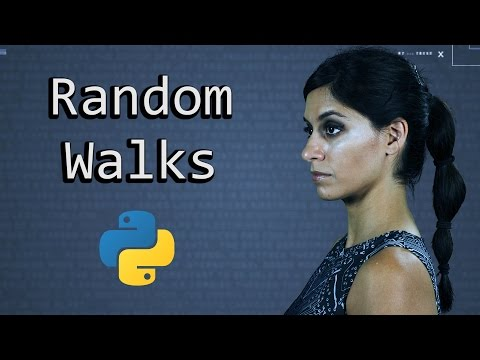

In [3]:
from IPython import display

video = display.YouTubeVideo('BfS2H1y6tzQ')
video
display.HTML(f'<a href="{video.src}">link</a>')

“[Monte Carlo methods](https://en.wikipedia.org/wiki/Monte_Carlo_method), or Monte Carlo experiments, are a broad class of computational algorithms that rely on repeated random sampling to obtain numerical results.” The [random walk](https://en.wikipedia.org/wiki/Random_walk#Higher_dimensions) is a function that is featured in solutions to problems that depend on random sampling.

A random walk over a two-dimensional grid of unit increments is effectively a random walk over a set of integers. Such a grid comes with the question,

>What is the longest random walk you can take so that _on average_ you will end up 4 blocks or fewer from home?

With brute force and clarity, we can write a naïve random walk function:

In [7]:
import random

def random_walk_naive(n):
    '''Return coordinates after `n` block random walk.'''

    x = 0
    y = 0 # both variables can be assigned on one line

    for i in range(n):
        step = random.choice(['N','S','E','W']) # use tuples to eliminate these strings

        if step == 'N':
            y = y + 1
        elif step == 'S':
            y = y - 1
        elif step == 'E':
            x = x + 1
        else:
            x = x - 1

    return (x, y)

In [8]:
for i in range(25):
    walk = random_walk_naive(10)
    print(walk, 'Distance from home:', abs(walk[0] + walk[1]))

(-1, 1) Distance from home: 0
(-2, -2) Distance from home: 4
(0, 2) Distance from home: 2
(-1, 5) Distance from home: 4
(2, 4) Distance from home: 6
(1, 3) Distance from home: 4
(1, 3) Distance from home: 4
(-3, 1) Distance from home: 2
(0, 4) Distance from home: 4
(-3, 3) Distance from home: 0
(1, -3) Distance from home: 2
(3, 1) Distance from home: 4
(-3, -3) Distance from home: 6
(-2, -4) Distance from home: 6
(-1, -5) Distance from home: 6
(2, 0) Distance from home: 2
(-2, -2) Distance from home: 4
(4, 0) Distance from home: 4
(-2, 2) Distance from home: 0
(2, 0) Distance from home: 2
(1, -3) Distance from home: 2
(2, -2) Distance from home: 0
(3, -7) Distance from home: 4
(-3, -3) Distance from home: 6
(1, 1) Distance from home: 2


In [9]:
def random_walk(n):
    '''Return coordinates after `n` block random walk.'''

    x, y = 0, 0

    for i in range(n):
        dx, dy = random.choice([
            (0, 1),  # N
            (0, -1), # S
            (1, 0),  # E
            (-1, 0), # W
        ])

        x += dx # increment assignment
        y += dy

    return (x, y)

In [15]:
for i in range(25):
    walk = random_walk(10)
    print(walk, 'Distance from home:', abs(walk[0] + walk[1]))

(-1, -1) Distance from home: 2
(1, -1) Distance from home: 0
(0, 0) Distance from home: 0
(1, -1) Distance from home: 0
(0, 2) Distance from home: 2
(3, 3) Distance from home: 6
(-1, 1) Distance from home: 0
(-1, -1) Distance from home: 2
(0, -4) Distance from home: 4
(2, 0) Distance from home: 2
(2, 0) Distance from home: 2
(-1, -1) Distance from home: 2
(4, -4) Distance from home: 0
(-6, 0) Distance from home: 6
(1, 1) Distance from home: 2
(-3, 3) Distance from home: 0
(-4, 2) Distance from home: 2
(-2, 0) Distance from home: 2
(-1, 1) Distance from home: 0
(4, 0) Distance from home: 4
(-1, -1) Distance from home: 2
(3, -5) Distance from home: 2
(-1, -1) Distance from home: 2
(0, 0) Distance from home: 0
(0, -2) Distance from home: 2


Now that we have decent random walk function, we can present our Monte Carlo simulation:

In [23]:
number_of_walks = 10**4
range_of_blocks = range(1, 31)

for number_of_blocks in range_of_blocks:
    count_of_walks_within_limit = 0 # count of walks ending up 4 blocks or fewer from home

    for i in range(number_of_walks):
        x, y = random_walk(number_of_blocks)

        distance = abs(x) + abs(y)

        if distance <= 4:
            count_of_walks_within_limit += 1

    count_of_walks_within_limit_percentage = float(count_of_walks_within_limit) / number_of_walks

    print('Number of blocks:',
        number_of_blocks,
        '/ % of walks within limit:',
        100 * count_of_walks_within_limit_percentage)

Number of blocks: 1 / % of walks within limit: 100.0
Number of blocks: 2 / % of walks within limit: 100.0
Number of blocks: 3 / % of walks within limit: 100.0
Number of blocks: 4 / % of walks within limit: 100.0
Number of blocks: 5 / % of walks within limit: 87.81
Number of blocks: 6 / % of walks within limit: 93.67999999999999
Number of blocks: 7 / % of walks within limit: 76.25999999999999
Number of blocks: 8 / % of walks within limit: 86.49
Number of blocks: 9 / % of walks within limit: 66.94
Number of blocks: 10 / % of walks within limit: 79.42
Number of blocks: 11 / % of walks within limit: 59.07
Number of blocks: 12 / % of walks within limit: 72.83
Number of blocks: 13 / % of walks within limit: 53.349999999999994
Number of blocks: 14 / % of walks within limit: 67.65
Number of blocks: 15 / % of walks within limit: 48.620000000000005
Number of blocks: 16 / % of walks within limit: 62.73
Number of blocks: 17 / % of walks within limit: 44.92
Number of blocks: 18 / % of walks within 

Whether `number_of_walks` is $10^4$ or $10^5$ we are seeing our chances plummet after 22 blocks.